# **Demonstration: Generating photometric redshift estimations**
# Import libraries

In [1]:
from pathlib import Path
from json import load
from PhotZ_LR import PhotZ_LR

# Import default configurations

model_config.json has default hyperparameters for the PhotZ_LR model: 
* number of input features
* nubmer of hidden neurons for each layer
* nubmer of hidden layers
* nubmer of training epochs
* learning rate
* batch size
* momentum

In [2]:
PACKAGE_PATH = Path.cwd()
with open("./model_config.json", "r") as f:
    json_dict = load(f)
    PhotZ_LR_config = json_dict["model"]["PhotZ_LR"]
PhotZ_LR_config

{'num_input_features': 5,
 'num_hidden_neurons': 128,
 'num_hidden_layers': 5,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32,
 'momentum': 0.9}

# Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input/output paths
    * "input_csv_path": the path of the input csv file of photometric redshift
    * "output_pdf_path"
    * "model_path": the path of the bese model to be saved

* Training-specific hyperparameters
    * CO_ratio
    * weights: written in the format of [[range...], [weights...]]
    * train_ratio: the ratio of a training set -- a value in between 0 and 1
    * rebalance: perform rebalancing if set to True
    * rebalance_list: a list of ranges and weights to rebalance; written in the same format as weights
    * evaluation: perform base-evaluation if set to True
    * evaluation_ratio: the ratio of a base evaluation set -- a value in between 0 and 1

* Others
    * model_no: model number (not a hyperparameter) 

In [ ]:
PhotZ_LR_config.update({
    "input_csv_path": PACKAGE_PATH / 'data/relz.csv',
    "model_path": PACKAGE_PATH,
    "output_csv_path": PACKAGE_PATH,

    # hyperparameters
    "train_ratio": 0.999,
    "evaluation": True,
    "evaluation_ratio": 0.3,

    "model_no": 0
})


# Train a model

Result of training is printed out and saved in PDF and CSV during the `PDF_MC.save_results()` function call

"model_no" is incremented by 1 every trianing, which is specified in the file names of a saved model and a result file, which can be found in `PZ_CO_ID/PZ_CO_ID/results`

best model
Epoch [1/300], Loss: 0.6485

best model
Epoch [2/300], Loss: 0.4427

best model
Epoch [3/300], Loss: 0.3552

best model
Epoch [5/300], Loss: 0.1476

Epoch [10/300], Loss: 0.2585

best model
Epoch [11/300], Loss: 0.1219

best model
Epoch [14/300], Loss: 0.1010

best model
Epoch [16/300], Loss: 0.0736

best model
Epoch [20/300], Loss: 0.0483

Epoch [30/300], Loss: 0.1727

best model
Epoch [32/300], Loss: 0.0471

best model
Epoch [33/300], Loss: 0.0271

best model
Epoch [38/300], Loss: 0.0160

Epoch [40/300], Loss: 0.3529

Epoch [50/300], Loss: 0.1974

Epoch [60/300], Loss: 0.0762

Epoch [70/300], Loss: 0.0680

Epoch [80/300], Loss: 0.3310

Epoch [90/300], Loss: 0.0335

best model
Epoch [91/300], Loss: 0.0071

Epoch [100/300], Loss: 0.0588

Epoch [110/300], Loss: 0.0219

Epoch [120/300], Loss: 0.0936

Epoch [130/300], Loss: 0.0415

Epoch [140/300], Loss: 0.0515

Epoch [150/300], Loss: 0.0407

Epoch [160/300], Loss: 0.0435

Epoch [170/300], Loss: 0.0332

Epoch [180/300], Loss: 0

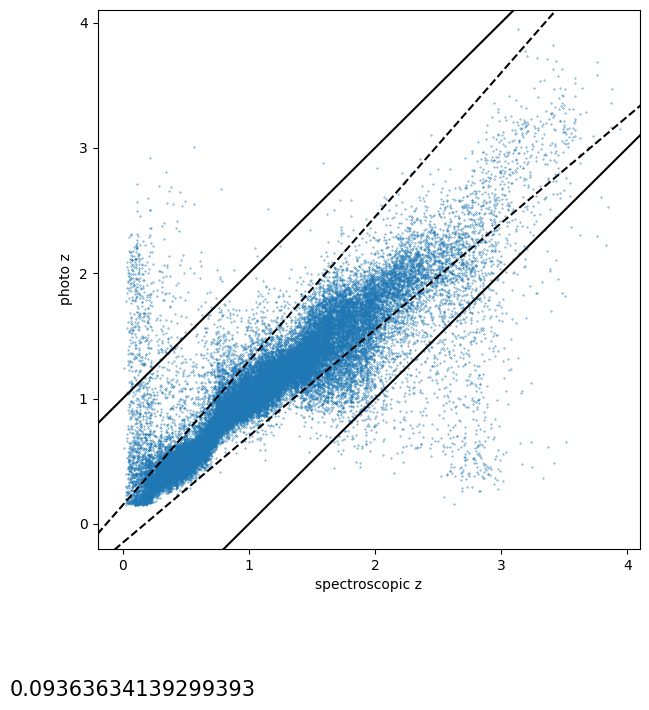

In [4]:
for i in range(1): # change the number to train models for multiple times
    PhotZ_LR_config['model_no'] += 1

    PhotZ_LR_model = PhotZ_LR(**PhotZ_LR_config)
    
    data = PhotZ_LR_model.preprocess_data()
    dl = PhotZ_LR_model.build_dl(data, PhotZ_LR_config)
    best_model = PhotZ_LR_model.train_model(dl, PhotZ_LR_config)
    results = PhotZ_LR_model.evaluate_model(data, dl, PhotZ_LR_config)
    PhotZ_LR_model.save_results(data, results, PhotZ_LR_config)